# Filtering the DataFrame with Boolean Arrays (Masks)

- Use [this CheatSheet](https://www.craft.do/s/G80r1dqrQKrjTb/b/F80131CD-4914-414F-8B93-C03B5D1AFCD5/DataFrame) to work better with the following exercises.

In this chapter, you will learn how to select specific parts of the data (masking) based on conditions we'll ask in the questions.

Framework to work on masking the DataFrames:

1. Identify the column of the condition
2. Access the column `df.column`
3. Compare column values based on the condition `df.column == value`; operators:
    1. Equal `==`
    2. Not equal `!=`
    2. Greater `>`
    3. Greater or equal `>=`
4. Save the boolean array into the mask `mask = df.column == value`
5. Filter the DataFrame with the mask `df[mask]`

```python
df.column
df.column == value
mask = df.column == value
df[mask]
```

## Load the data

The data is taken from [this kaggle repository](https://www.kaggle.com/datasets/azminetoushikwasi/ucl-202122-uefa-champions-league?select=goals.csv).

In [48]:
import pandas as pd

df_players = pd.read_csv('key_stats.csv', index_col='player_name')
df_players

,club,position,minutes_played,match_played,goals,assists,distance_covered
player_name,,,,,,,
Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
...,...,...,...,...,...,...,...
Maouassa,Club Brugge,Defender,1,1,0,0,0.2
Zesiger,Young Boys,Defender,1,1,0,0,-


## Simple conditions

### Players who scored 10 or more goals

In [50]:
mask_goals = df_players.goals >= 10

df_players[mask_goals]

,club,position,minutes_played,match_played,goals,assists,distance_covered
player_name,,,,,,,
Benzema,Real Madrid,Forward,1106,12,15,1,121.5
Lewandowski,Bayern,Forward,876,10,13,3,99.7
Haller,Ajax,Forward,668,8,11,1,82.2


### Players who assisted 5 or more times

In [51]:
mask_assists = df_players.assists >= 5

df_players[mask_assists]

,club,position,minutes_played,match_played,goals,assists,distance_covered
player_name,,,,,,,
Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
Sané,Bayern,Midfielder,798,10,6,6,94
Antony,Ajax,Forward,577,7,2,5,65.1
Bruno Fernandes,Man. United,Midfielder,520,7,0,7,58.4


## Multiple conditions

### Filter the goalkeepers who gave at least one assist

In [58]:
mask_goalkeeper = df_players.position == 'Goalkeeper'
mask_assists = df_players.assists > 0

df_players[mask_goalkeeper & mask_assists]

,club,position,minutes_played,match_played,goals,assists,distance_covered
player_name,,,,,,,
Neuer,Bayern,Goalkeeper,810,9,0,1,51.2


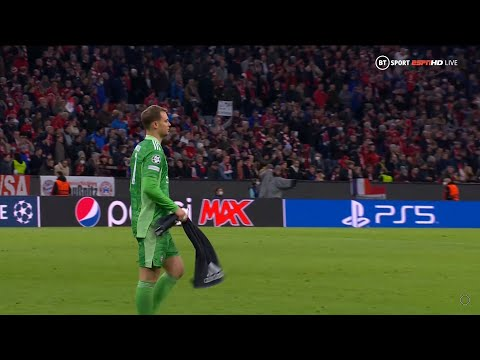

In [57]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('g4mPT36U1-s')

### Forwards with at least 700 minutes played

In [64]:
mask_minutes_played = df_players.minutes_played >= 700
mask_position = df_players.position == 'Forward'

df_players[mask_minutes_played & mask_position]

,club,position,minutes_played,match_played,goals,assists,distance_covered
player_name,,,,,,,
Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
Benzema,Real Madrid,Forward,1106,12,15,1,121.5
Salah,Liverpool,Forward,1008,13,8,2,112.0
Lewandowski,Bayern,Forward,876,10,13,3,99.7
Müller,Bayern,Forward,778,10,4,3,98.5
Rafa Silva,Benfica,Forward,704,9,1,1,85.7


### Real Madrid players who scored

In [65]:
mask_club = df_players.club == 'Real Madrid'
mask_goals = df_players.goals > 0

df_players[mask_goals & mask_club]

,club,position,minutes_played,match_played,goals,assists,distance_covered
player_name,,,,,,,
Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
Benzema,Real Madrid,Forward,1106,12,15,1,121.5
Alaba,Real Madrid,Defender,1040,12,1,0,112.3
Kroos,Real Madrid,Midfielder,902,12,2,0,116.5
Rodrygo,Real Madrid,Forward,505,11,5,2,65.7
Asensio,Real Madrid,Forward,207,8,1,2,28.4


### FC Barcelona players who scored

In [66]:
mask_club = df_players.club == 'Barcelona'
mask_goals = df_players.goals > 0

df_players[mask_goals & mask_club]

,club,position,minutes_played,match_played,goals,assists,distance_covered
player_name,,,,,,,
Piqué,Barcelona,Defender,393,5,1,0,44
Fati,Barcelona,Forward,154,3,1,0,19.7


### Real Madrid players who scored and assisted

In [67]:
mask_club = df_players.club == 'Real Madrid'

mask_goals = df_players.goals > 0
mask_assists = df_players.assists > 0

df_players[mask_assists & mask_goals & mask_club]

,club,position,minutes_played,match_played,goals,assists,distance_covered
player_name,,,,,,,
Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
Benzema,Real Madrid,Forward,1106,12,15,1,121.5
Rodrygo,Real Madrid,Forward,505,11,5,2,65.7
Asensio,Real Madrid,Forward,207,8,1,2,28.4


### FC Barcelona players who scored and assisted

In [68]:
mask_club = df_players.club == 'Barcelona'

mask_goals = df_players.goals > 0
mask_assists = df_players.assists > 0

df_players[mask_assists & mask_goals & mask_club]

,club,position,minutes_played,match_played,goals,assists,distance_covered
player_name,,,,,,,


### Defenders who scored and assisted

In [69]:
mask_position = df_players.position == 'Defender'
mask_assists = df_players.assists > 0
mask_goals = df_players.goals > 0

df_players[mask_assists & mask_goals & mask_position]

,club,position,minutes_played,match_played,goals,assists,distance_covered
player_name,,,,,,,
João Cancelo,Man. City,Defender,840,9,2,3,100.3
Azpilicueta,Chelsea,Defender,679,9,1,1,82
Christensen,Chelsea,Defender,603,8,1,1,62.6
Blind,Ajax,Defender,572,8,1,1,70.9
Rakitskyy,Zenit,Defender,497,6,1,2,52.3
Mukiele,Leipzig,Defender,484,6,1,1,57
Renan Lodi,Atlético,Defender,478,10,1,2,61.7
Palomino,Atalanta,Defender,450,5,1,1,50.5
Hefti,Young Boys,Defender,386,6,1,1,38.8


## Combine masks with unions and intersections

### FC Barcelona players who scored or assisted

In [70]:
mask_club = df_players.club == 'Barcelona'

mask_goals = df_players.goals > 0
mask_assists = df_players.assists > 0

df_players[(mask_goals | mask_assists) & mask_club]

,club,position,minutes_played,match_played,goals,assists,distance_covered
player_name,,,,,,,
Piqué,Barcelona,Defender,393,5,1,0,44
Jordi Alba,Barcelona,Defender,375,5,0,1,45.8
Fati,Barcelona,Forward,154,3,1,0,19.7


### Liverpool players who scored or assisted

In [71]:
mask_club = df_players.club == 'Liverpool'

mask_goals = df_players.goals > 0
mask_assists = df_players.assists > 0

df_players[(mask_goals | mask_assists) & mask_club]

,club,position,minutes_played,match_played,goals,assists,distance_covered
player_name,,,,,,,
Salah,Liverpool,Forward,1008,13,8,2,112.0
Fabinho,Liverpool,Midfielder,849,13,1,0,105.5
...,...,...,...,...,...,...,...
Origi,Liverpool,Forward,187,7,1,1,23.8
Jones,Liverpool,Midfielder,185,4,0,2,27.1
